Importing liabraries

In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

loading csv file as dataframe

In [76]:
df=pd.read_csv(r"C:\Users\cheta\OneDrive\Desktop\data analytics\projects\python\customer purchase behaviour\dataset.csv",encoding='unicode_escape')

checking file structure 

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User ID           15000 non-null  int64  
 1   Age               13500 non-null  float64
 2   Gender            14250 non-null  object 
 3   Country           13800 non-null  object 
 4   Purchase Amount   13200 non-null  float64
 5   Purchase Date     13950 non-null  object 
 6   Product Category  14100 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 820.4+ KB


*data cleaning*


1.checking for null values

In [78]:
df.isnull().sum()

User ID                0
Age                 1500
Gender               750
Country             1200
Purchase Amount     1800
Purchase Date       1050
Product Category     900
dtype: int64

2.removing null values

In [79]:
df.dropna(inplace=True)

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9076 entries, 0 to 14998
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User ID           9076 non-null   int64  
 1   Age               9076 non-null   float64
 2   Gender            9076 non-null   object 
 3   Country           9076 non-null   object 
 4   Purchase Amount   9076 non-null   float64
 5   Purchase Date     9076 non-null   object 
 6   Product Category  9076 non-null   object 
dtypes: float64(2), int64(1), object(4)
memory usage: 567.2+ KB


3. adding age group column

In [81]:
df.loc[df['Age']<20,'Age group']='Teenager'
df.loc[df['Age']<46,'Age group']='Adult'
df.loc[df['Age']>=46,'Age group']='Senior'

4.Changing Datatype

In [82]:
df['Purchase Date']=pd.to_datetime(df['Purchase Date'])

5. Adding Month column

In [83]:
df['Purchase Month']=df['Purchase Date'].dt.month

6. Adding Year Column

In [84]:
df['Purchase Year']=df['Purchase Date'].dt.year

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9076 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   User ID           9076 non-null   int64         
 1   Age               9076 non-null   float64       
 2   Gender            9076 non-null   object        
 3   Country           9076 non-null   object        
 4   Purchase Amount   9076 non-null   float64       
 5   Purchase Date     9076 non-null   datetime64[ns]
 6   Product Category  9076 non-null   object        
 7   Age group         9076 non-null   object        
 8   Purchase Month    9076 non-null   int32         
 9   Purchase Year     9076 non-null   int32         
dtypes: datetime64[ns](1), float64(2), int32(2), int64(1), object(4)
memory usage: 709.1+ KB


*Exploratory data analysis*

1.Age groupwise sales

Text(0.5, 1.0, 'Age group wise Sales')

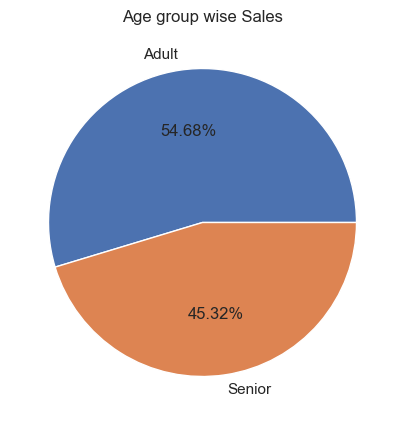

In [86]:
sales_age=df.groupby(('Age group'),as_index=False)['Purchase Amount'].sum().sort_values(by='Purchase Amount',ascending=False)


plt.pie(x='Purchase Amount',labels='Age group',data=sales_age,autopct='%.2f%%')
plt.title('Age group wise Sales')


2. Country wise sales


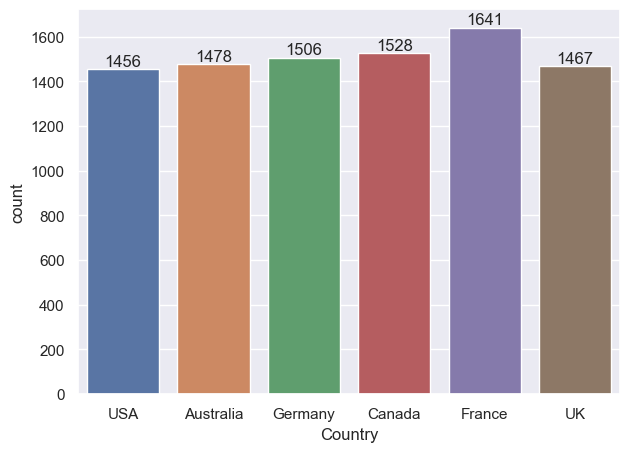

In [87]:
xn=sb.countplot(data=df,x='Country',hue='Country')
for bars in xn.containers:
    xn.bar_label(bars)

3. gender and age group wise sales


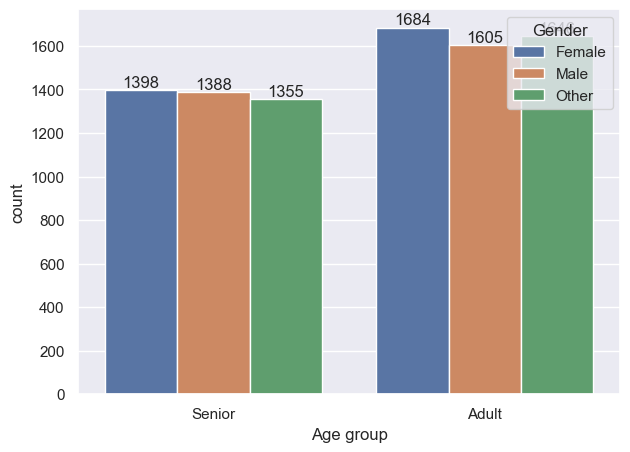

In [88]:
yn=sb.countplot(data=df,x='Age group',hue='Gender')
sb.set(rc={'figure.figsize':(15,5)})
for bars in yn.containers:
    yn.bar_label(bars)

4.Category wise sales


Text(0.5, 1.0, 'Category wise Sales')

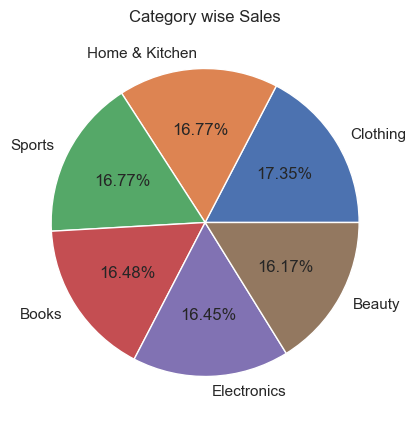

In [89]:
sales_category=df.groupby(('Product Category'),as_index=False)['Purchase Amount'].sum().sort_values(by='Purchase Amount',ascending=False)


plt.pie(x='Purchase Amount',labels='Product Category',data=sales_category,autopct='%.2f%%')
plt.title('Category wise Sales')

5. Gender wise sales


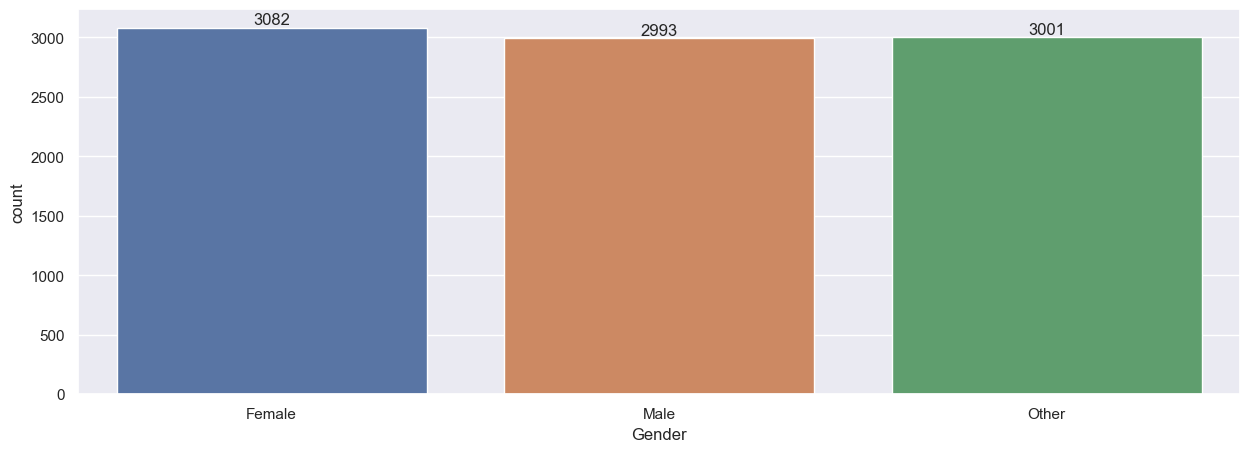

In [90]:
an=sb.countplot(data=df,x='Gender',hue='Gender')
sb.set(rc={'figure.figsize':(7,5)})
for bars in an.containers:
    an.bar_label(bars)

6.Monthwise sales


<Axes: xlabel='Purchase Month', ylabel='Purchase Amount'>

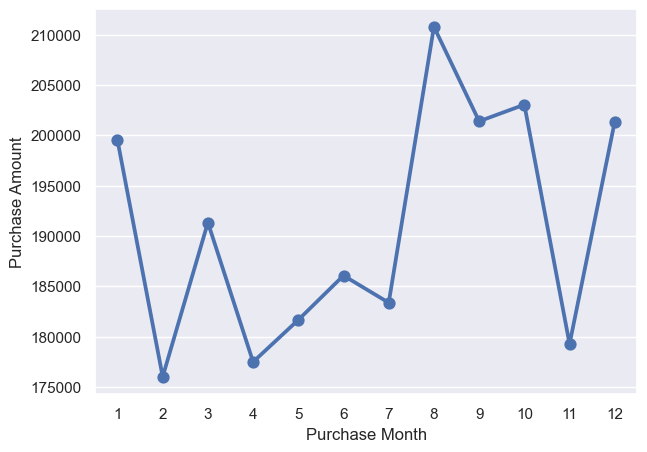

In [91]:
monthly_sales=df.groupby(('Purchase Month'),as_index=False)['Purchase Amount'].sum().sort_values(by='Purchase Amount',ascending=False)

sb.pointplot(x='Purchase Month',y='Purchase Amount',data=monthly_sales)


7.Yearly Sales

([<matplotlib.patches.Wedge at 0x1c4f1cc06a0>,
 [Text(0.7634259249777063, 0.7919475090382782, '2020'),
  Text(-0.8111478463759407, 0.7429933857846067, '2023'),
  Text(-0.7444055584167886, -0.8098520634030572, '2022'),
  Text(0.7906161904542852, -0.7648045759483618, '2021')],
 [Text(0.4164141408969307, 0.4319713685663335, '25.58%'),
  Text(-0.44244427984142215, 0.4052691195188764, '25.23%'),
  Text(-0.40603939550006646, -0.44173748912894023, '24.72%'),
  Text(0.4312451947932464, -0.41716613233547, '24.47%')])

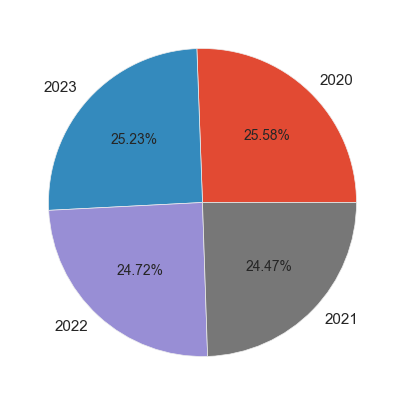

In [105]:
yearly_sales=df.groupby(('Purchase Year'),as_index=False)['Purchase Amount'].sum().sort_values(by='Purchase Amount',ascending=False)

plt.pie('Purchase Amount',labels='Purchase Year',data=yearly_sales,autopct='%.2f%%')

